# 1. Load the Dataset

In [ ]:
 import pandas as pd
 import numpy as np
 # Load the dataset
 df_0_1 = pd.read_csv("/content/drive/MyDrive/AI_AND_MACHINE_LEARNING/Workshop-3/mnist_0_and_1.csv")
 # Extract features and labels
 X = df_0_1.drop(columns=["label"]).values # 784 pixels
 y = df_0_1["label"].values # Labels (0 or 1)
 # Check the shape of the features and labels
 print("Feature matrix shape:", X.shape)
 print("Label vector shape:", y.shape)

Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


 Question- 1:

 What does the shape of X represent ?

The shape of X represents the number of images (rows) and the number of pixels per image (columns).

 Question- 2:

 What does the shape of y represent ?

 The shape of y represents the number of labels, which is equal to the number of images. Each value in y is either 0 or 1, indicating the digit in the image.

# Task - 1: Implementation of MCP Neurons:

1. Design a MCP Neuron for ”AND” Boolean Functions and ”OR” Boolean Functions with two inputs: Hint:
•	Aggregate all the inputs.
•	Handcraft a Threshold values for ”AND” and ”OR” Function.
•	Implement a ifelse statement as stated above.
You may use code base provided below or write your own code from scratch:
For ”AND” Operations.


In [ ]:
def MCP_Neurons_AND(X1, X2, T=2):
    """
    Implements basic AND operation using an MCP Neuron.

    Arguments:
    X1 (list): A list of binary values.
    X2 (list): A list of binary values.
    T (int): Threshold value for activation (default is 2 for AND).

    Returns:
    list: Neuron state (1 or 0) for each input pair.
    """
    assert len(X1) == len(X2), "Input lists must be of the same length."

    state_neuron = []
    for i in range(len(X1)):
        sum_inputs = X1[i] + X2[i]
        if sum_inputs >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron

def MCP_Neurons_OR(X1, X2, T=1):
    """
    Implements basic OR operation using an MCP Neuron.

    Arguments:
    X1 (list): A list of binary values.
    X2 (list): A list of binary values.
    T (int): Threshold value for activation (default is 1 for OR).

    Returns:
    list: Neuron state (1 or 0) for each input pair.
    """
    assert len(X1) == len(X2), "Input lists must be of the same length."

    state_neuron = []
    for i in range(len(X1)):
        sum_inputs = X1[i] + X2[i]
        if sum_inputs >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron

# Example Test Cases
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]

print("AND Operation:", MCP_Neurons_AND(X1, X2))
print("OR Operation:", MCP_Neurons_OR(X1, X2))


AND Operation: [0, 0, 0, 1]
OR Operation: [0, 1, 1, 1]


# Answer the Following Question:

 • You can use Text cell of your notebook to answer the question.
 • Question- 1: List out all the limitations of MCP- Neurons.
 • Question- 2: Think if you can develop a logic to solve for XOR function using MCP Neuron.
 {Can you devise a if else rules.}

Question:1 List out all the limitations of MCP- Neurons

1. Cannot Solve Non-Linearly Separable Problems
Ans-
MCP neurons can only handle linearly separable problems like AND and OR. They fail for functions like XOR, which require more complex decision boundaries.

2. No Learning Capability
The weights and threshold in MCP neurons are manually set and do not adjust based on data. Unlike modern neural networks, MCP neurons cannot learn from experience.

3. Binary Inputs and Outputs
MCP neurons only work with binary (0 or 1) inputs and outputs, making them unsuitable for real-world applications that require continuous values.

4. Rigid Thresholding
5. No concept of weights

Question-2

Think if you can develop a logic to solve for XOR function using MCP Neuron.
 {Can you devise a if else rules.}

The XOR function is not linearly separable, meaning a single MCP neuron cannot solve it. However, we can combine multiple MCP neurons to implement XOR.

Truth Table for XOR

X1	X2	AND(X1, X2)	OR(X1, X2)	XOR Output

0	0	0	0	0

0	1	0	1	1

1	0	0	1	1

1	1	1	1	0

# 2. Visualize the Dataset:


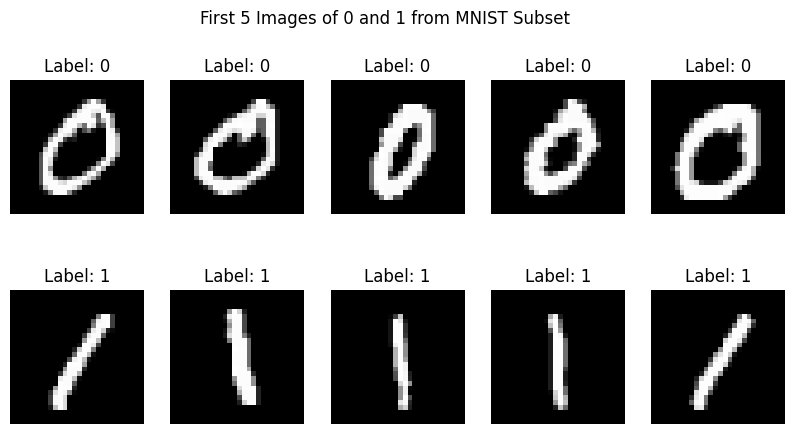

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df_0_1 = pd.read_csv("/content/drive/MyDrive/AI_AND_MACHINE_LEARNING/Workshop-3/mnist_0_and_1.csv")  # Ensure correct file path

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

# Check if we have at least 5 images for each label
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    # Create subplots
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))

    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")

        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")

    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()


# 3. Initialize Weights and Bias:

In [ ]:
 # Initialize weights and bias
 weights = np.zeros(X.shape[1]) # 784 weights (one for each pixel)
 bias = 0
 learning_rate = 0.1
 epochs = 100

Answer the Following Question:

Question- 3: What does the weights array represent in this context?

Answ:

The weights array represents the importance of each pixel in the classification task. Since there are 784 pixels per image (28×28), there are 784 weights, each associated with a pixel to determine how much it contributes to predicting the digit (0 or 1).

 Question- 4: Why are we initializing the weights to zero? What effect could this have on the training process?

 Answ:

Initializing weights to zero means all neurons will update identically, leading to symmetry and preventing the model from learning properly. In practice, small random values are preferred for initialization to allow diverse learning.


4. ImplementaDecisionFunctionorActivationFunction:

In [ ]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels (0 or 1) for the input data
    """
    predictions = np.dot(X, weights) + bias  # Linear combination

    # Step function activation
    y_pred_all = np.where(predictions >= 0, 1, 0)  # Convert to 0 or 1

    return y_pred_all


5.ImplementthePerceptronLearningAlgorithm:

In [ ]:
import numpy as np

def decision_function(X, weights, bias):
    """Compute the predicted labels using a step function."""
    predictions = np.dot(X, weights) + bias  # Linear function
    return np.where(predictions >= 0, 1, 0)  # Step activation function

def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data), shape (n_samples, n_features)
    - y: Labels (true output), shape (n_samples,)
    - weights: Initial weights, shape (n_features,)
    - bias: Initial bias (scalar)
    - learning_rate: Learning rate for weight updates (default: 0.1)
    - epochs: Number of iterations to train the model (default: 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct predictions
    """

    n_samples = X.shape[0]

    for epoch in range(epochs):
        correct_predictions = 0  # Track correct classifications

        for i in range(n_samples):
            # Compute prediction
            y_pred = decision_function(X[i], weights, bias)

            # Update weights and bias if misclassified
            if y_pred != y[i]:
                weights += learning_rate * (y[i] - y_pred) * X[i]
                bias += learning_rate * (y[i] - y_pred)
            else:
                correct_predictions += 1  # Count correct predictions

        # Compute accuracy after each epoch
        accuracy = correct_predictions / n_samples

    return weights, bias, accuracy


Question-5:

Whatisthepurposeoftheoutput=np.dot(X[i],weights)+biasline?

Answ:

This line calculates the linear combination of the input features (X[i]) and their corresponding weights (weights). The result of np.dot(X[i], weights) gives the weighted sum of the input features, and adding the bias shifts the result to account for any offset. This combined value (linear output) is then passed through the activation function (step function) to generate the prediction.

Question- 6:

What happens when the prediction is wrong? How are the weights and
bias updated?

Answ:
When the prediction is wrong (i.e., the model's output does not match the true label), the weights and bias are updated to correct the error.
Weight Update: The weights are adjusted based on the difference between the true label (y[i]) and the predicted label (y_pred), multiplied by the input features (X[i]):
weights
+
=
𝜂
⋅
(
𝑦
[
𝑖
]
−
𝑦
_
𝑝
𝑟
𝑒
𝑑
)
⋅
𝑋
[
𝑖
]
weights+=η⋅(y[i]−y_pred)⋅X[i]
where
𝜂
η is the learning rate.
Bias Update: The bias is adjusted by the same factor (learning rate times the error):
bias
+
=
𝜂
⋅
(
𝑦
[
𝑖
]
−
𝑦
_
𝑝
𝑟
𝑒
𝑑
)
bias+=η⋅(y[i]−y_pred)
This update ensures that the model becomes more accurate over time by reducing the prediction error.

Question- 7:

Why is the final accuracy important, and what do you expect it to be?

Answ:

Final accuracy is important because it indicates how well the model has learned to classify the data correctly. It is a measure of the model's performance on the dataset.
After training, you would expect the accuracy to be high (close to 1) if the model has learned effectively and classified most of the samples correctly. The expected accuracy depends on the complexity of the data and the training process, but for simple binary classification tasks (like digit 0 and 1), the accuracy should be reasonably high after sufficient training.

# 6. Putting it all Together:

In [ ]:
 # After training the model with the perceptron_learning_algorithm
 weights, bias, accuracy = train_perceptron(X, y, weights, bias)
 # Evaluate the model using the new function
 print("The Final Accuracy is: ", accuracy)

The Final Accuracy is:  1.0


 7. Visualizing the Misclassified Image:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already trained your perceptron and have the weights, bias, and data
# For simplicity, let's assume `X`, `y`, `weights`, and `bias` are already defined.

# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)  # Step function to classify as 0 or 1

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]  # Get indices of misclassified images

if len(misclassified_idx) > 0:
    # Create a plot to show misclassified images
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))

    # Show up to 10 misclassified images
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")

    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")


Final Accuracy: 1.0000
All images were correctly classified!


Question8:
 What does misclassified_idx store, and how is it used in this code?

Answ:

misclassified_idx stores the indices of the images where the predicted label (y_pred) does not match the true label (y). It is calculated using np.where(y_pred != y)[0], which returns the indices where the prediction is incorrect.
In this code, it is used to select and display the misclassified images. If there are any misclassified images, they are shown in the plot with their predicted and true labels. If no misclassified images exist, the message "All images were correctly classified!" is displayed.

 Question- 9:
 How do you interpret the result if the output is ”All images were
 correctly classified!”?

 Answ:

If the output is "All images were correctly classified!", it means that the perceptron model has perfectly classified all the input data, with no errors in the predictions. This could indicate that the model has learned the decision boundary well for the specific task. However, it could also suggest overfitting (if the model is trained on a small dataset) or easy separability (if the dataset is very simple).


# To- Do:
 1. Implement each Step as we implemented above.
 2. Visualize the final misclassified images and Provide your conclusion.

Final Accuracy: 0.9858


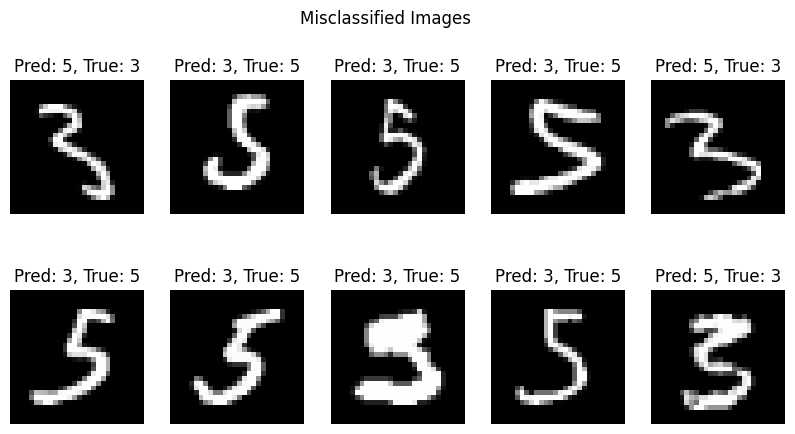

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df_3_and_5 = pd.read_csv("/content/drive/MyDrive/AI_AND_MACHINE_LEARNING/Workshop-3/mnist_3_and_5.csv")

# Extract features and labels
X = df_3_and_5.drop(columns=["label"]).values  # 784 pixels per image
y = df_3_and_5["label"].values  # Labels (either 3 or 5)

# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

# Decision function (step activation function)
def decision_function(X, weights, bias):
    predictions = np.dot(X, weights) + bias
    return np.where(predictions >= 0, 5, 3)

# Perceptron training algorithm
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    n_samples = X.shape[0]

    for epoch in range(epochs):
        correct_predictions = 0

        for i in range(n_samples):
            y_pred = decision_function(X[i], weights, bias)

            if y_pred != y[i]:
                weights += learning_rate * (y[i] - y_pred) * X[i]
                bias += learning_rate * (y[i] - y_pred)
            else:
                correct_predictions += 1

        accuracy = correct_predictions / n_samples

    return weights, bias, accuracy

# Train the perceptron model
weights, bias, accuracy = train_perceptron(X, y, weights, bias, learning_rate, epochs)

# Print final accuracy
print(f"Final Accuracy: {accuracy:.4f}")

# Step 5: Visualize Misclassified Images
predictions = decision_function(X, weights, bias)
misclassified_idx = np.where(predictions != y)[0]

if len(misclassified_idx) > 0:
    # Create a plot to show misclassified images
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))

    # Show up to 10 misclassified images
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {predictions[idx]}, True: {y[idx]}")
        ax.axis("off")

    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")
